In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ejercicio Regression Tree
Son datos de temperaturas tomados de la ciudad de Seattle. El objetivo es intentar predecir lo mejor posible la máxima temperatura (columna `actual`) que alcanzaremos al día siguiente. Para ello contaremos con temperaturas de los dos días anteriores, históricos de máximas temperaturas y un amigo bastante chapas que te da su predicción del tiempo cada día.

**Resumen de datos**:
* year: 2016 for all data points
* month: number for month of the year
* day: number for day of the year
* week: day of the week as a character string
* temp_2: max temperature 2 days prior
* temp_1: max temperature 1 day prior
* average: historical average max temperature
* actual: max temperature measurement
* friend: your friend’s prediction, a random number between 20 below the average and 20 above the average


### 1. Importa el csv "temps.csv"

In [60]:
temps = pd.read_csv('data/temps.csv')

### 2. Realiza un análisis exploratorio junto con un Feature Engineering

In [61]:
temps.head()

,year,month,day,week,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
0,2016,1,1,Fri,45,45,45.6,45,43,50,44,29
1,2016,1,2,Sat,44,45,45.7,44,41,50,44,61
2,2016,1,3,Sun,45,44,45.8,41,43,46,47,56
3,2016,1,4,Mon,44,41,45.9,40,44,48,46,53
4,2016,1,5,Tues,41,40,46.0,44,46,46,46,41


In [62]:
temps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 348 entries, 0 to 347
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            348 non-null    int64  
 1   month           348 non-null    int64  
 2   day             348 non-null    int64  
 3   week            348 non-null    object 
 4   temp_2          348 non-null    int64  
 5   temp_1          348 non-null    int64  
 6   average         348 non-null    float64
 7   actual          348 non-null    int64  
 8   forecast_noaa   348 non-null    int64  
 9   forecast_acc    348 non-null    int64  
 10  forecast_under  348 non-null    int64  
 11  friend          348 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 32.8+ KB


In [63]:
temps.describe()

,year,month,day,temp_2,temp_1,average,actual,forecast_noaa,forecast_acc,forecast_under,friend
count,348.0,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000,348.000000
mean,2016.0,6.477011,15.514368,62.652299,62.701149,59.760632,62.543103,57.238506,62.373563,59.772989,60.034483
std,0.0,3.498380,8.772982,12.165398,12.120542,10.527306,11.794146,10.605746,10.549381,10.705256,15.626179
min,2016.0,1.000000,1.000000,35.000000,35.000000,45.100000,35.000000,41.000000,46.000000,44.000000,28.000000
25%,2016.0,3.000000,8.000000,54.000000,54.000000,49.975000,54.000000,48.000000,53.000000,50.000000,47.750000
50%,2016.0,6.000000,15.000000,62.500000,62.500000,58.200000,62.500000,56.000000,61.000000,58.000000,60.000000
75%,2016.0,10.000000,23.000000,71.000000,71.000000,69.025000,71.000000,66.000000,72.000000,69.000000,71.000000
max,2016.0,12.000000,31.000000,117.000000,117.000000,77.400000,92.000000,77.000000,82.000000,79.000000,95.000000


In [64]:
temps.drop(columns=['week', 'friend', 'year'], inplace = True)

In [ ]:
temps['verano'] = (
    ((temps.month == 6) & (temps.day >= 21)) |
    ((temps.month > 6) & (temps.month < 9)) | 
    ((temps.month == 9) & (temps.day <= 22))).astype(int)  
temps['primavera'] = (
    ((temps.month == 3) & (temps.day >= 21)) |
    ((temps.month > 3) & (temps.month < 6)) | 
    ((temps.month == 6) & (temps.day <= 22))).astype(int)
temps['otoño'] = (
    ((temps.month == 9) & (temps.day >= 23)) |
    ((temps.month > 9) & (temps.month < 12)) | 
    ((temps.month == 12) & (temps.day <= 21))).astype(int)
temps['invierno'] = (
    ((temps.month == 12) & (temps.day >= 22)) |
    (temps.month < 3) |
    ((temps.month == 3) & (temps.day <= 19))).astype(int)
# divido los datos en base a la estación en la que se encuentre

<Axes: >

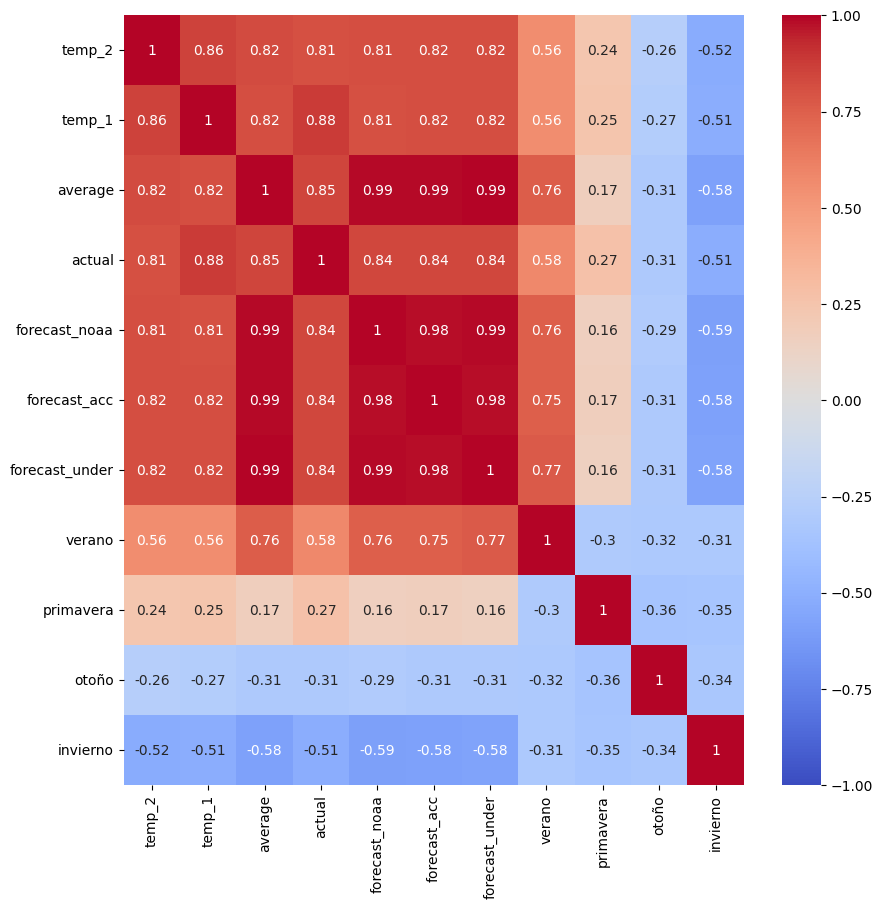

In [68]:
plt.figure(figsize = (10,10))
sns.heatmap(data = temps.corr(), vmin = -1, vmax = 1, cmap = 'coolwarm', annot = True)

In [67]:
temps.drop(columns = ['month', 'day'], inplace = True)

### 3. Selecciona variables y divide en train y test

In [69]:
X = temps[['temp_2', 'temp_1', 'average', 'forecast_noaa', 'forecast_acc', 'forecast_under', 'verano', 'primavera', 'otoño', 'invierno']]
y = temps['actual']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(278, 10)
(70, 10)
(278,)
(70,)


### 4. Entrena el modelo


In [75]:
from sklearn.tree import DecisionTreeClassifier

In [100]:
arbolito = DecisionTreeClassifier(max_depth=5,
                                  random_state=42)
arbolito.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [101]:
y_pred = arbolito.predict(X_test)

### 5. Evaluación de tu modelo
Calcula el coeficiente de determinación. 

Calcula el MAE, MAPE, MSE y RMSE.

In [102]:
print("R2 score", arbolito.score(X_test, y_test))
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", mean_squared_error(y_test, y_pred)**(1/2))

R2 score 0.05714285714285714
MAE 5.385714285714286
MSE 57.58571428571429
RMSE 7.58852517197606


### 6. Representa el árbol de decisión

[Text(0.5024509803921569, 0.9166666666666666, 'x[1] <= 59.5\ngini = 0.972\nsamples = 278\nvalue = [2, 3, 5, 3, 2, 1, 3, 4, 4, 1, 7, 7, 4, 8\n9, 4, 8, 11, 4, 13, 4, 9, 15, 5, 4, 8, 8, 8\n6, 9, 14, 2, 2, 12, 5, 7, 7, 9, 7, 8, 1, 5\n5, 4, 2, 2, 2, 1, 1, 1, 1, 1]'),
 Text(0.2647058823529412, 0.75, 'x[2] <= 55.75\ngini = 0.948\nsamples = 116\nvalue = [2, 3, 5, 3, 2, 1, 3, 4, 4, 1, 7, 7, 4, 8\n9, 4, 8, 10, 3, 10, 1, 3, 6, 2, 2, 1, 2, 1\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.383578431372549, 0.8333333333333333, 'True  '),
 Text(0.1568627450980392, 0.5833333333333334, 'x[2] <= 46.75\ngini = 0.942\nsamples = 106\nvalue = [2, 3, 5, 3, 2, 1, 3, 4, 4, 1, 7, 7, 4, 8\n9, 4, 8, 10, 3, 10, 0, 1, 1, 2, 0, 1, 2, 1\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.0784313725490196, 0.4166666666666667, 'x[1] <= 40.5\ngini = 0.9\nsamples = 30\nvalue = [2, 3, 5, 3, 2, 1, 3, 4, 1, 1, 3, 0, 1, 0\n0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,

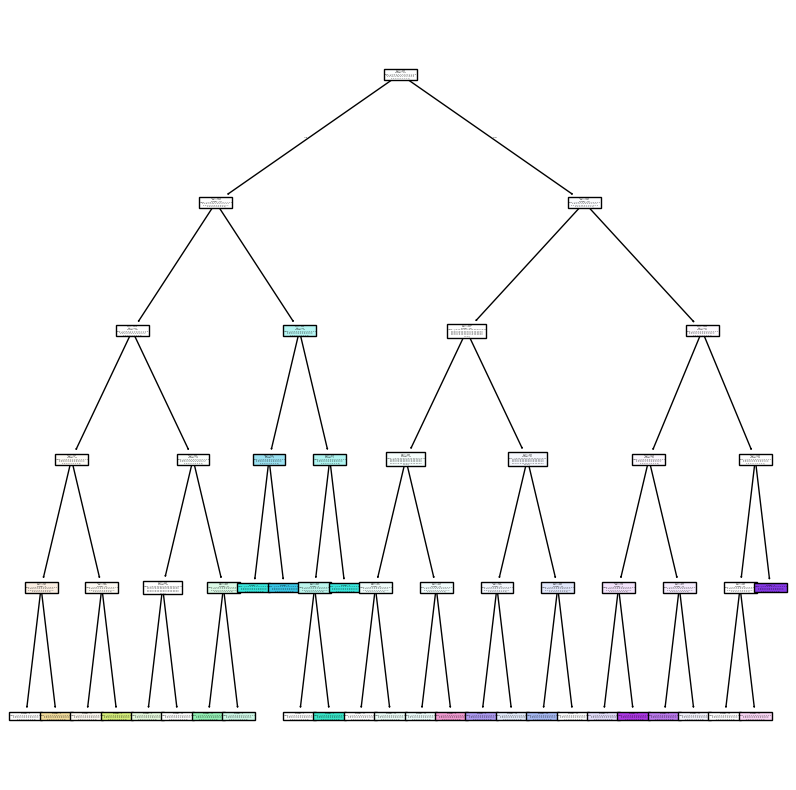

In [103]:
plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(arbolito, filled = True)

### 7. Modifica el max_depth a 3 y vuelve a entrenarlo

In [124]:
arbolito2 = DecisionTreeClassifier(max_depth=3,
                                  random_state=42)
arbolito2.fit(X_train, y_train)
y_pred2 = arbolito2.predict(X_test)

### 8. Vuelve a evaluar tu modelo

In [125]:
print("R2 score", arbolito2.score(X_test, y_test))
print("MAE", mean_absolute_error(y_test, y_pred2))
print("MSE", mean_squared_error(y_test, y_pred2))
print("RMSE", mean_squared_error(y_test, y_pred2)**(1/2))

R2 score 0.05714285714285714
MAE 5.557142857142857
MSE 59.614285714285714
RMSE 7.721028798954562


### 9. Vuelve a representar su árbol

[Text(0.5, 0.875, 'x[1] <= 59.5\ngini = 0.972\nsamples = 278\nvalue = [2, 3, 5, 3, 2, 1, 3, 4, 4, 1, 7, 7, 4, 8\n9, 4, 8, 11, 4, 13, 4, 9, 15, 5, 4, 8, 8, 8\n6, 9, 14, 2, 2, 12, 5, 7, 7, 9, 7, 8, 1, 5\n5, 4, 2, 2, 2, 1, 1, 1, 1, 1]'),
 Text(0.25, 0.625, 'x[2] <= 55.75\ngini = 0.948\nsamples = 116\nvalue = [2, 3, 5, 3, 2, 1, 3, 4, 4, 1, 7, 7, 4, 8\n9, 4, 8, 10, 3, 10, 1, 3, 6, 2, 2, 1, 2, 1\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[2] <= 46.75\ngini = 0.942\nsamples = 106\nvalue = [2, 3, 5, 3, 2, 1, 3, 4, 4, 1, 7, 7, 4, 8\n9, 4, 8, 10, 3, 10, 0, 1, 1, 2, 0, 1, 2, 1\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.0625, 0.125, 'gini = 0.9\nsamples = 30\nvalue = [2, 3, 5, 3, 2, 1, 3, 4, 1, 1, 3, 0, 1, 0\n0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.1875, 0.125, 'gini = 0.912\nsamples = 76\n

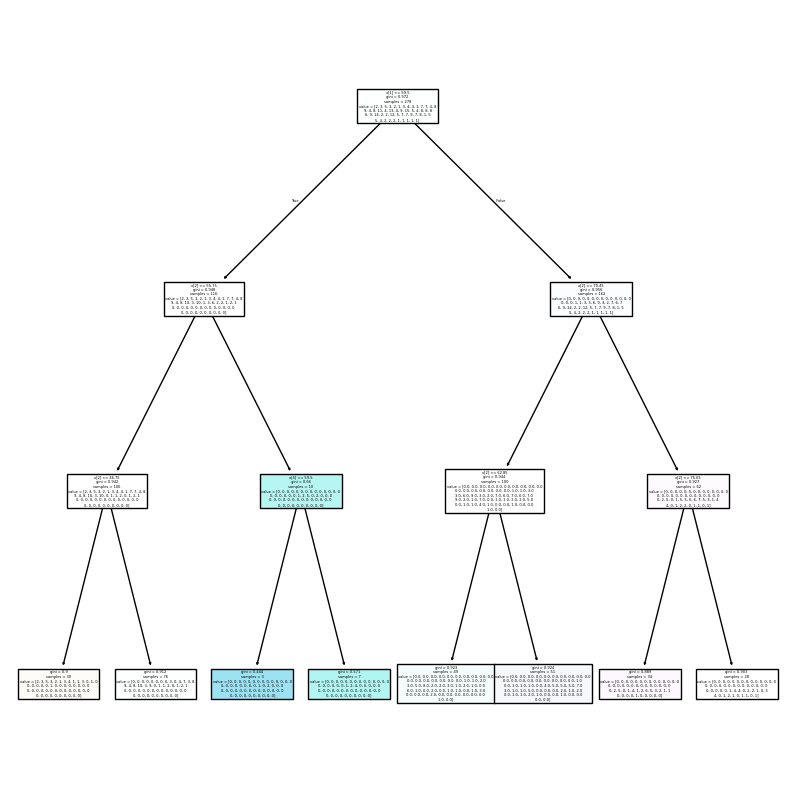

In [126]:
plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(arbolito2, filled = True)

### 10. Utiliza un grid search con cross validation para hiperparametrizar tu modelo

In [109]:
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import KFold, StratifiedKFold

In [110]:
kfold = KFold(5)

In [127]:
results_cv = cross_val_score(arbolito2, X_train, y_train, scoring="accuracy", cv=kfold)
print(results_cv)
print(results_cv.mean())
print(results_cv.std())

[0.03571429 0.07142857 0.05357143 0.05454545 0.07272727]
0.05759740259740259
0.013598587130086673


In [128]:
cross_validate(arbolito2, X_train, y_train, scoring="accuracy", cv=kfold)

{'fit_time': array([0.00334024, 0.00300694, 0.0027957 , 0.00368285, 0.00269175]),
 'score_time': array([0.00215125, 0.00205255, 0.00151253, 0.00163198, 0.0019381 ]),
 'test_score': array([0.03571429, 0.07142857, 0.05357143, 0.05454545, 0.07272727])}

### 11. Obten el `feature_importances` de cada variable en el último modelo

In [129]:
arbolito2.feature_importances_

array([0.        , 0.25962822, 0.67925296, 0.        , 0.06111883,
       0.        , 0.        , 0.        , 0.        , 0.        ])

### 12. Construye un nuevo modelo `DecisionTreeClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [156]:
temps['masquince'] = (temps['actual'] > 59)

In [158]:
X = temps[['temp_2', 'temp_1', 'average', 'forecast_noaa', 'forecast_acc', 'forecast_under', 'verano', 'primavera', 'otoño', 'invierno', 'actual']]
y = temps['masquince']

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(278, 11)
(70, 11)
(278,)
(70,)


In [163]:
arbolito3 = DecisionTreeClassifier(max_depth=3,
                                  random_state=42)
arbolito3.fit(X_train, y_train)
y_pred3 = arbolito3.predict(X_test)

In [164]:
results_cv = cross_val_score(arbolito3, X_train, y_train, scoring="accuracy", cv=kfold)
print(results_cv)
print(results_cv.mean())
print(results_cv.std())

[1. 1. 1. 1. 1.]
1.0
0.0


In [165]:
cross_validate(arbolito3, X_train, y_train, scoring="accuracy", cv=kfold)

{'fit_time': array([0.00236201, 0.00251555, 0.00294709, 0.00240755, 0.00316906]),
 'score_time': array([0.00170064, 0.00172424, 0.00256252, 0.00196719, 0.0016427 ]),
 'test_score': array([1., 1., 1., 1., 1.])}

[Text(0.5, 0.75, 'x[10] <= 59.5\ngini = 0.486\nsamples = 278\nvalue = [116, 162]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 116\nvalue = [116, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 162\nvalue = [0, 162]'),
 Text(0.625, 0.5, '  False')]

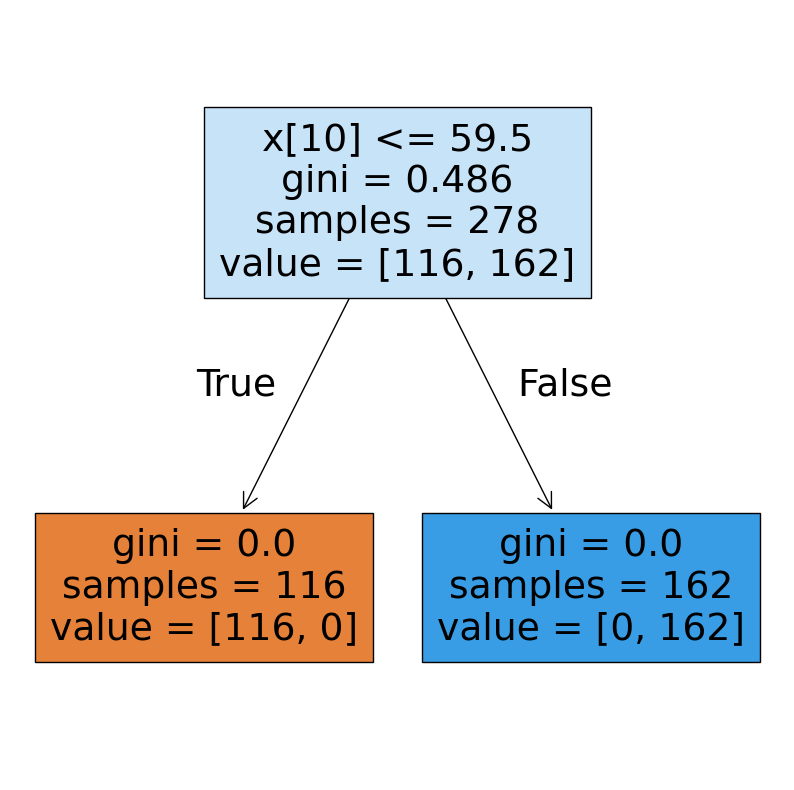

In [166]:
plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(arbolito3, filled = True)

### 13. Construye un nuevo modelo `RandomForestClassifier` que te clasifique cuando en un día va a hacer una temperatura mayor a 15ºC. ¡Deberá tratarse como un problema de **clasificación**! Utiliza un grid search con cross validation y evalúa el mejor modelo.

In [143]:
from sklearn.ensemble import RandomForestClassifier

In [167]:
arbolito4 = DecisionTreeClassifier(max_depth=3,
                                  random_state=42)
arbolito4.fit(X_train, y_train)
y_pred4 = arbolito4.predict(X_test)

In [168]:
results_cv = cross_val_score(arbolito4, X_train, y_train, scoring="accuracy", cv=kfold)
print(results_cv)
print(results_cv.mean())
print(results_cv.std())

[1. 1. 1. 1. 1.]
1.0
0.0


In [169]:
cross_validate(arbolito3, X_train, y_train, scoring="accuracy", cv=kfold)

{'fit_time': array([0.0032618 , 0.00310445, 0.00272942, 0.00228477, 0.00273514]),
 'score_time': array([0.0019393 , 0.00190187, 0.00214338, 0.00155115, 0.00212908]),
 'test_score': array([1., 1., 1., 1., 1.])}

[Text(0.5, 0.75, 'x[10] <= 59.5\ngini = 0.486\nsamples = 278\nvalue = [116, 162]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 116\nvalue = [116, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 162\nvalue = [0, 162]'),
 Text(0.625, 0.5, '  False')]

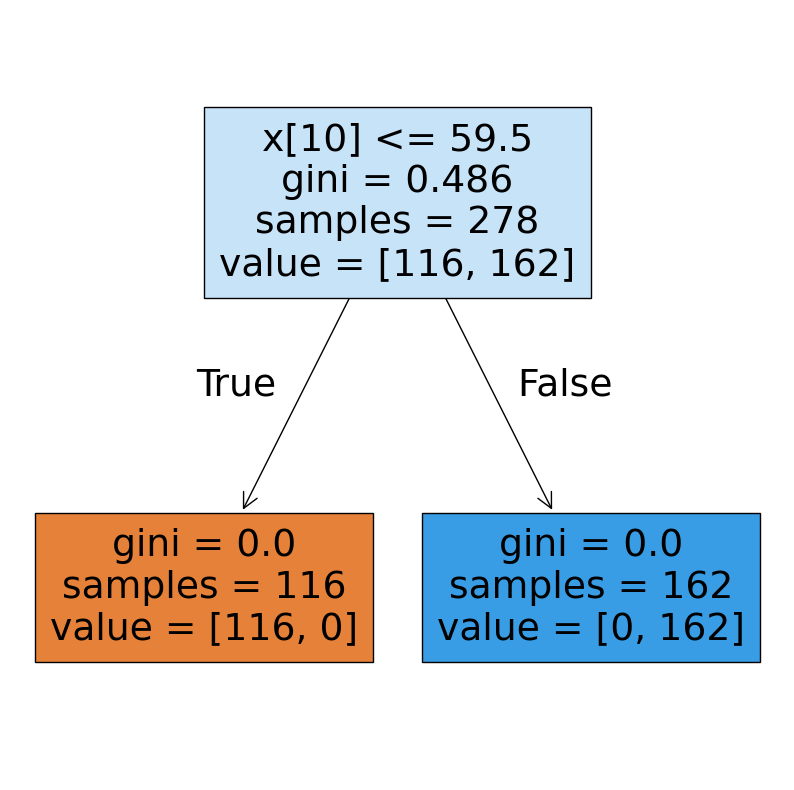

In [170]:
plt.figure(figsize=(10,10))
sklearn.tree.plot_tree(arbolito4, filled = True)